In [1]:
"""
CONFIGURATION:

In this cell we can choose the database we want to use.
We can also use this cell for more general configurations and imports.
"""

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib.patches as mpatches
import database


db = database.db_connect(dbname="", user="")
db.set_client_encoding('UTF8')

In [2]:
"""
HELP:

Prints functions currently available in database.py.
"""
database.help()

   database.db_connect(dbname, user)
   database.db_query(db, query)
   database.db_print(result)
   database.get_centroid(db)
   database.get_taxi_stands(db)
   database.get_taxi_services(db, limit=-1)
   database.get_freguesia_count(db, distrito, concelho)
   database.getCoordsScale_freguesia(db, distrito, concelho)
   database.get_freguesia_locations(db, distrito, concelho, freguesia)
   database.get_centroid_freguesia(db, distrito, concelho, freguesia)


In [3]:
"""
QUERIES:

In this cell we have all queries that are executed to produce the aggregation map.

To get all freguesias and their respective number of finalized services, from a concelho in a specific distrito, we use:
    - count = database.get_freguesia_count(db, distrito, concelho)
    
    This will return an array of tuples with name of freguesia and the respective count value
    Example:
        count = [('Paranhos', 128479), ('Campanhã', 97289), ('Ramalde', 86292)]
        
        
To get the minimum and maximum values for the x and y coordenates for graphic scaling, we use:
    - scale = database.getCoordsScale_freguesia(db, distrito, concelho)
    
    This will return an array of tuples, where [(min_Y, max_Y, min_X, max_X)]
    Example:
        scale = [(41.1383506797128, 41.1859353051989, -8.69129406942044, -8.55261345505833)]


To get all points of a specific freguesia, we use:
    - locations = database.get_freguesia_locations(db, distrito, concelho, freguesia)
    
    This will return an array of tuples with latitute and longitude.
    Example:
        locations = [(41.1603709427206,-8.6223466370208), (41.155704, -8.602515), (41.154408, -8.613297)]

To get the centroid coordenates of a specific freguesia, we use:
    - center = database.get_centroid_freguesia(db, distrito, concelho, freguesia)

    This will return an array of tuples with latitute and longitude.
    Example:
        center = [(41.1603709427206,-8.6223466370208)]
""";

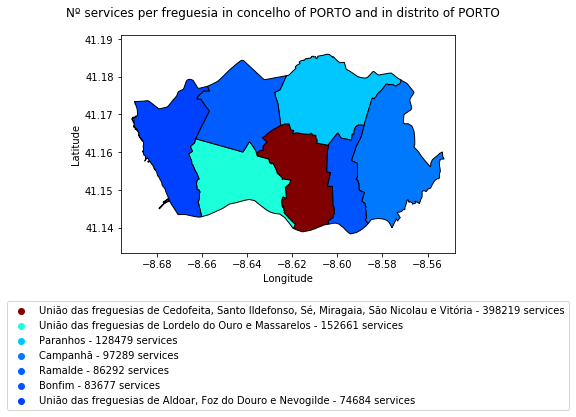

In [4]:
# AGGREGATION MAP per FREGUESIA IN A SPECIFIC CONCELHO AND DISTRITO

distrito = "PORTO"
concelho = "PORTO"

count = database.get_freguesia_count(db, distrito, concelho)
scale = database.getCoordsScale_freguesia(db, distrito, concelho)

fig, ax = plt.subplots()
fig.suptitle('Nº services per freguesia in concelho of ' + concelho + ' and in distrito of ' + distrito)

#--------- draw each freguesia -------
for row in range(0, len(count)):
    freguesia = count[row][0]
    nservices = count[row][1]
    
    # get a color based on the nº of services
    my_col = cm.jet(nservices/np.amax(count[0][1]))
    
    # get all point of a specific freguesia and plot them
    locations = database.get_freguesia_locations(db, distrito, concelho, freguesia)
    ax.add_patch(mpatches.Polygon(locations, fc=my_col, ec='k')) 
    
    # centroid point of freguesia
    center = database.get_centroid_freguesia(db, distrito, concelho, freguesia)
    
    #plot the scatter point of the centroid, for labelling purposes 
    ax.scatter(center[1], center[0], cmap='hot', c=[my_col], label=freguesia + " - " + str(nservices) + " services")
#-------------------------------------


# ---- graphic viewing settings ----
min_Y = scale[0][0]
max_Y = scale[0][1]
min_X = scale[0][2]
max_X = scale[0][3]

ax.set_xlim(min_X-0.005, max_X+0.005)
ax.set_ylim(min_Y-0.005, max_Y+0.005)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
#-----------------------------------

plt.show()